# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [1]:
#!pip install tensorflow[and-cuda] numpy==1.25.2 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [2]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 1
2.18.0


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [33]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Importing callbacks to improve training:
# - EarlyStopping: stops training when validation loss stops improving to prevent overfitting
# - ReduceLROnPlateau: reduces learning rate when validation loss stagnates to help escape plateaus
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Import the GlobalAveragePooling2D layer used to reduce spatial dimensions from feature maps
from tensorflow.keras.layers import GlobalAveragePooling2D

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# **Data Overview**


##Loading the data

In [5]:
# Import the drive module from Google Colab to access Google Drive
from google.colab import drive

# Mount Google Drive to the Colab environment at the specified path
# This will prompt the user to authorize access to their Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load a NumPy array of images from Google Drive
images = np.load('/content/drive/MyDrive/images_proj.npy')

# Load a CSV file containing labels into a pandas DataFrame
labels = pd.read_csv('/content/drive/MyDrive/Labels_proj.csv')

In [8]:
print(f"Dataset shape: {images.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Image data type: {images.dtype}")
print(f"Image value range: [{images.min()}, {images.max()}]")
print(f"Unique labels: {np.unique(labels)}")

Dataset shape: (631, 200, 200, 3)
Labels shape: (631, 1)
Image data type: uint8
Image value range: [0, 255]
Unique labels: [0 1]


# **Exploratory Data Analysis**

###Plot random images from each of the classes and print their corresponding labels.

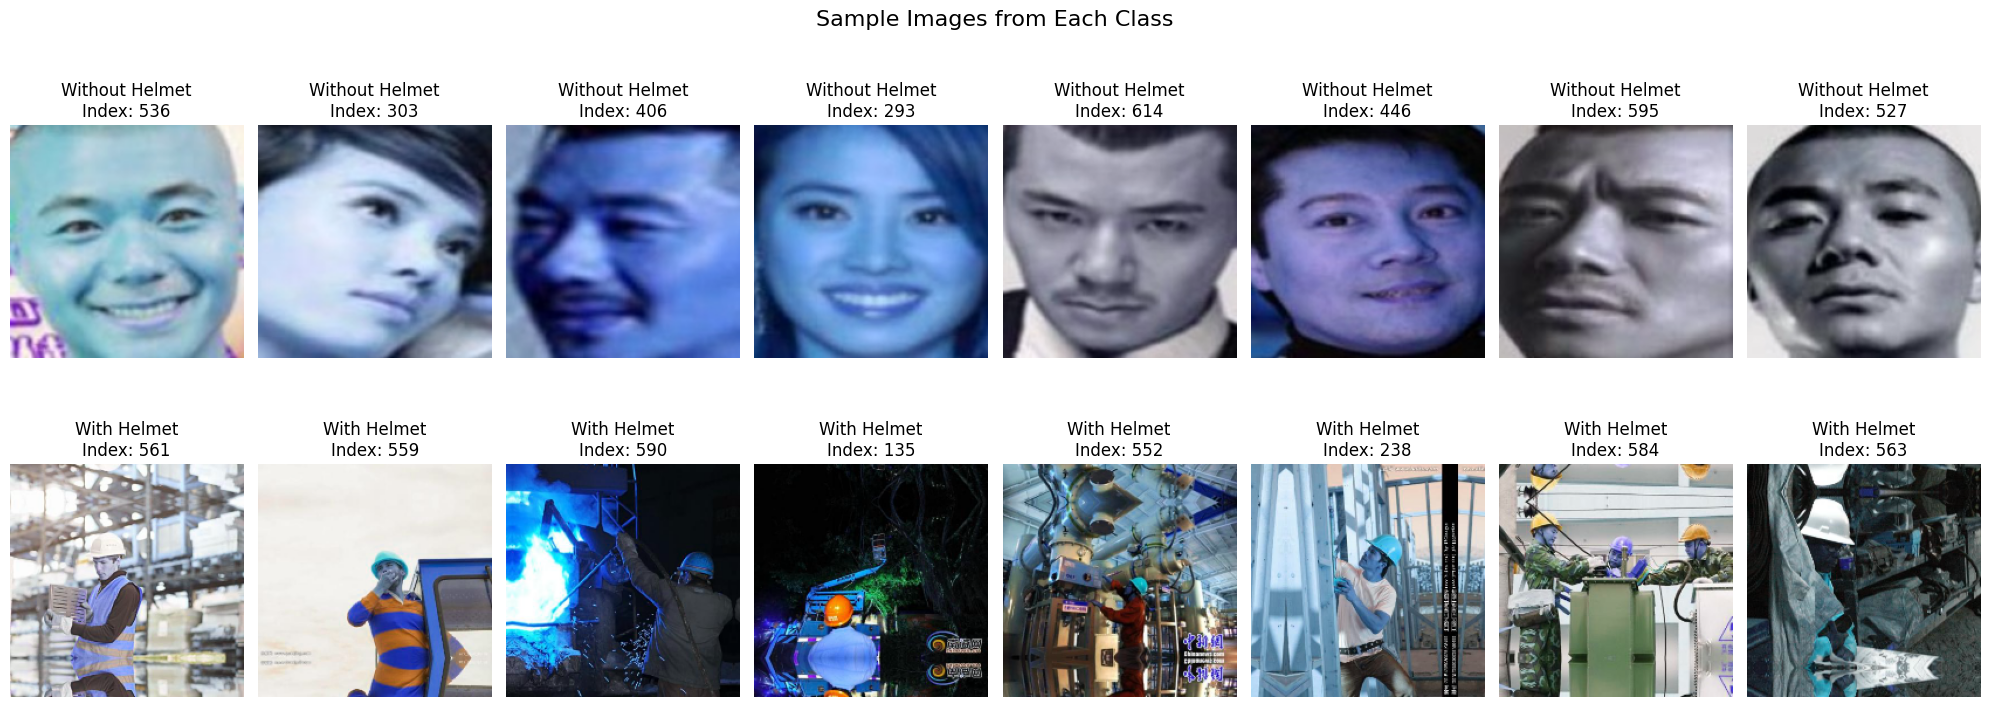

In [9]:
def plot_sample_images(images, labels, n_samples=8):
    """Plot random images from each class"""
    fig, axes = plt.subplots(2, n_samples, figsize=(20, 8))

    # Without helmet samples
    without_helmet_indices = np.where(labels == 0)[0]
    sample_indices_0 = np.random.choice(without_helmet_indices, n_samples, replace=False)

    # With helmet samples
    with_helmet_indices = np.where(labels == 1)[0]
    sample_indices_1 = np.random.choice(with_helmet_indices, n_samples, replace=False)

    for i in range(n_samples):
        # Without helmet
        axes[0, i].imshow(images[sample_indices_0[i]])
        axes[0, i].set_title(f'Without Helmet\nIndex: {sample_indices_0[i]}')
        axes[0, i].axis('off')

        # With helmet
        axes[1, i].imshow(images[sample_indices_1[i]])
        axes[1, i].set_title(f'With Helmet\nIndex: {sample_indices_1[i]}')
        axes[1, i].axis('off')

    plt.suptitle('Sample Images from Each Class', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_sample_images(images, labels)

## Checking for class imbalance


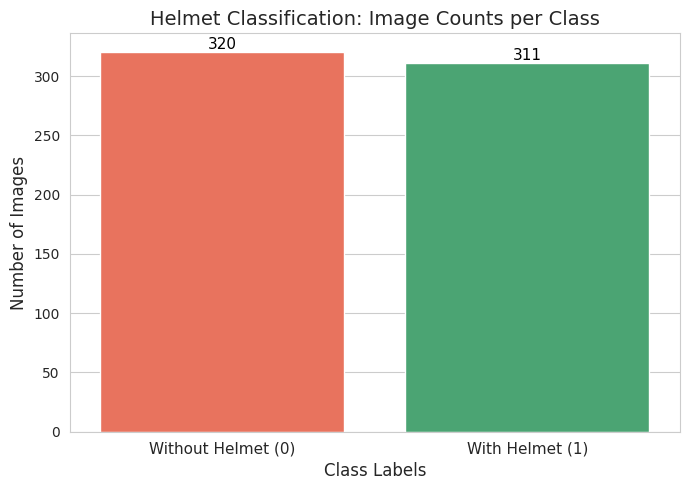

In [15]:
# Set figure size and style
plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")

# Create the count plot with class labels
ax = sns.countplot(
    x=labels.iloc[:, 0],
    palette={'0': "tomato", '1': "mediumseagreen"}  # chaves como string
)

# Annotate each bar with its count
for bar in ax.patches:
    height = int(bar.get_height())
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11, color='black')

# Customize axes and title
ax.set_xlabel("Class Labels", fontsize=12)
ax.set_ylabel("Number of Images", fontsize=12)
ax.set_title("Helmet Classification: Image Counts per Class", fontsize=14)
ax.set_xticklabels(["Without Helmet (0)", "With Helmet (1)"], fontsize=11)

# Optional: Adjust layout and show
plt.tight_layout()
plt.show()

**Observations:**

1. The dataset is well-balanced, with 49.3% of the images labeled as "Without

  Helmet" and 50.7% as "With Helmet".

2. The images cover diverse scenarios, including construction sites and industrial settings.

3. There is significant variation in lighting conditions, camera angles, and worker postures across the dataset.

4. The workers are engaged in a range of activities, such as standing, using tools, and moving.

5. The overall image quality and resolution appear consistent throughout the dataset.


# **Data Preprocessing**

## Converting images to grayscale

Grayscale images shape: (631, 200, 200)


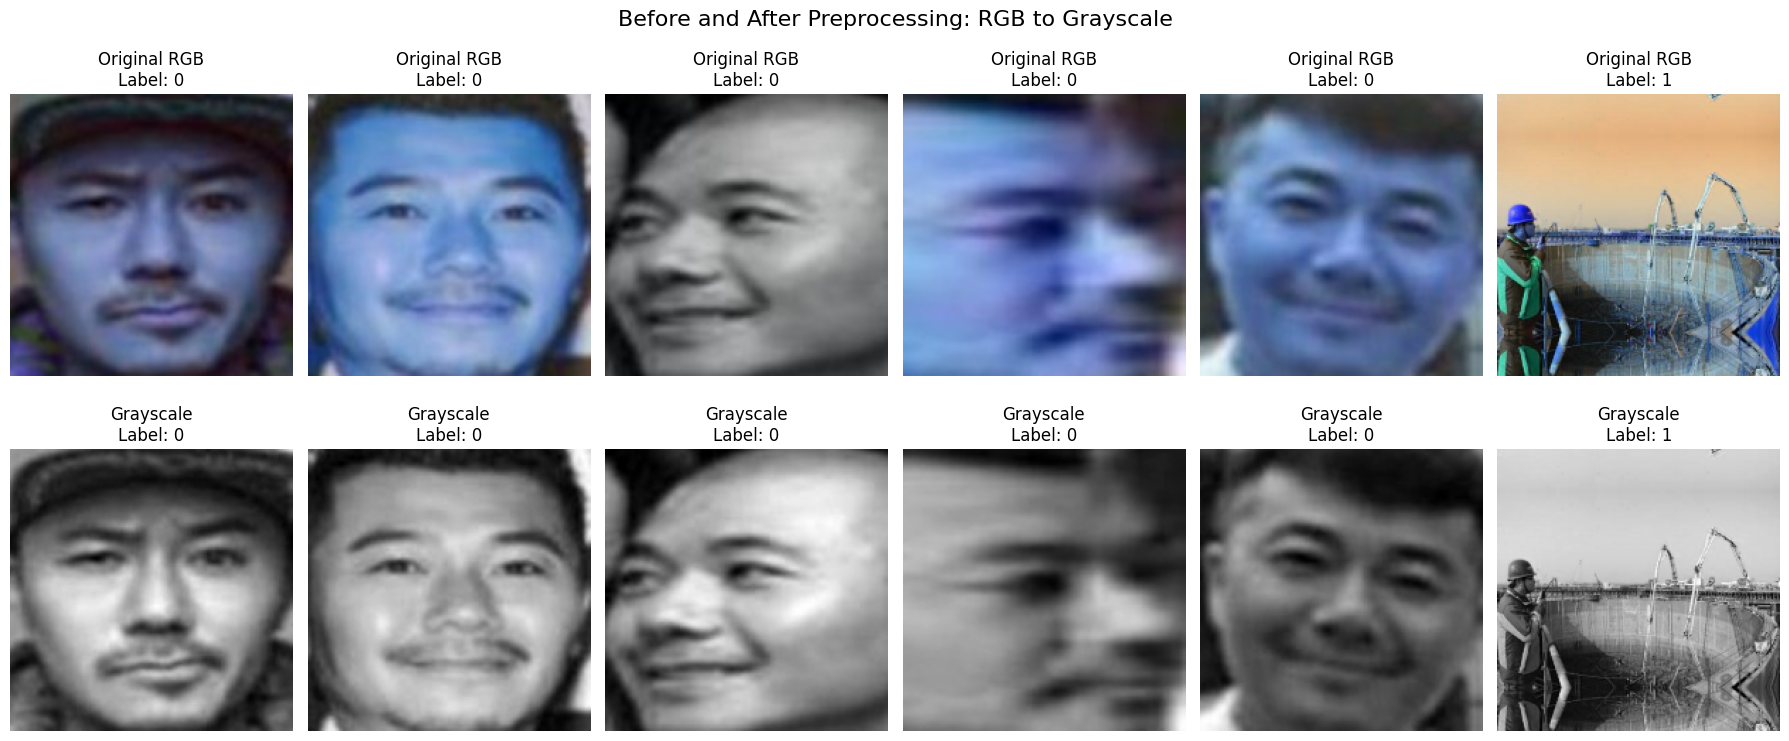

Processed images shape: (631, 200, 200, 1)


In [8]:
# Convert RGB images to Grayscale
def rgb_to_grayscale(images):
    """Convert RGB images to grayscale"""
    # Using OpenCV conversion weights: 0.299*R + 0.587*G + 0.114*B
    grayscale_images = np.dot(images[...,:3], [0.299, 0.587, 0.114])
    return grayscale_images.astype(np.uint8)

# Convert to grayscale
images_gray = rgb_to_grayscale(images)
print(f"Grayscale images shape: {images_gray.shape}")

# Plot before and after preprocessing
fig, axes = plt.subplots(2, 6, figsize=(18, 8))
sample_indices = np.random.choice(len(images), 6, replace=False)

for i, idx in enumerate(sample_indices):
    # Original RGB
    axes[0, i].imshow(images[idx])
    axes[0, i].set_title(f'Original RGB\nLabel: {labels.iloc[idx, 0]}')
    axes[0, i].axis('off')

    # Grayscale
    axes[1, i].imshow(images_gray[idx], cmap='gray')
    axes[1, i].set_title(f'Grayscale\nLabel: {labels.iloc[idx, 0]}')
    axes[1, i].axis('off')

plt.suptitle('Before and After Preprocessing: RGB to Grayscale', fontsize=16)
plt.tight_layout()
plt.show()

# Reshape grayscale images for CNN (add channel dimension)
images_processed = images_gray.reshape(images_gray.shape[0],
                                     images_gray.shape[1],
                                     images_gray.shape[2], 1)
print(f"Processed images shape: {images_processed.shape}")

**Observations:**

I chose to implement the grayscale conversion using NumPy and vectorized operations because it aligns better with the approach we've been learning so far, which emphasizes clean, efficient, and NumPy-based data preprocessing.

1. Efficiency through Vectorization:
Instead of looping over each image, I applied a vectorized np.dot() operation, which processes the entire dataset at once. This is faster and scales better for large image sets.

2. Clarity and Consistency:
The formula used (0.299*R + 0.587*G + 0.114*B) follows the standard grayscale conversion and is explicitly written, making the code more transparent and easier to follow.

3. Smooth Integration with ML Workflow:
The grayscale output stays in the NumPy array format, which integrates seamlessly with visualization, reshaping, and further steps in TensorFlow/Keras pipelines.

This approach keeps the entire workflow consistent and efficient, building on the techniques we've been applying throughout the project.

### Splitting the dataset



In [9]:
# Split the dataset (60% train, 20% validation, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    images_processed, labels, test_size=0.2, random_state=42, stratify=labels)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

### Data Normalization

In [10]:
# Data Normalization
X_train_norm = X_train.astype('float32') / 255.0
X_val_norm = X_val.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

print(f"\nNormalization completed!")


Normalization completed!


# **Model Building**

##Model Evaluation Criterion

## Utility Functions

In [36]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predict and apply threshold
    pred = model.predict(predictors).reshape(-1) > 0.5

    # Convert target to numpy array if it's a pandas Series
    if hasattr(target, "to_numpy"):
        target = target.to_numpy().reshape(-1)
    else:
        target = target.reshape(-1)

    # Compute metrics
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred, average='weighted')
    precision = precision_score(target, pred, average='weighted')
    f1 = f1_score(target, pred, average='weighted')

    # Return as DataFrame
    df_perf = pd.DataFrame({
        "Accuracy": [acc],
        "Recall": [recall],
        "Precision": [precision],
        "F1 Score": [f1]
    })

    return df_perf

In [38]:
def plot_confusion_matrix(model, predictors, target, ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1) > 0.5

    # Ensure compatibility with both pandas Series and numpy array
    if hasattr(target, "to_numpy"):
        target = target.to_numpy().reshape(-1)
    else:
        target = target.reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target, pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

In [17]:
# defining a function to plot training and validation metrics from a Keras model history
def plot_training_history(history, title="Training History"):
    """
    Function to plot training and validation accuracy and loss over epochs

    history: Keras History object returned by model.fit()
    title: plot title (optional)
    """

    # creating subplot with two axes side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # plotting training and validation accuracy
    axes[0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Model Accuracy')  # setting title
    axes[0].set_xlabel('Epoch')          # setting x-axis label
    axes[0].set_ylabel('Accuracy')       # setting y-axis label
    axes[0].legend()                     # showing legend
    axes[0].grid(True)                   # adding grid for better readability

    # plotting training and validation loss
    axes[1].plot(history.history['loss'], label='Training Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title('Model Loss')      # setting title
    axes[1].set_xlabel('Epoch')          # setting x-axis label
    axes[1].set_ylabel('Loss')           # setting y-axis label
    axes[1].legend()                     # showing legend
    axes[1].grid(True)                   # adding grid

    # setting the overall title and adjusting layout
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

In [22]:
# defining a function to visualize model predictions on sample images
def visualize_predictions(model, X_data, y_data, n_samples=8, title="Model Predictions"):
    """
    Function to visualize model predictions on a random subset of images

    model: trained Keras model
    X_data: image data (NumPy array)
    y_data: true labels (Pandas DataFrame or Series)
    n_samples: number of samples to display (default = 8)
    title: title of the overall plot (optional)
    """

    # generate predicted probabilities
    y_pred_prob = model.predict(X_data)
    # convert probabilities to binary class predictions
    y_pred = (y_pred_prob > 0.5).astype(int)

    # randomly select sample indices
    indices = np.random.choice(len(X_data), n_samples, replace=False)

    # create a 2x4 subplot grid
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.ravel()  # flatten axes array for easy indexing

    # iterate through selected indices
    for i, idx in enumerate(indices):
        # show grayscale or RGB image depending on channel count
        if X_data.shape[-1] == 1:  # grayscale image
            axes[i].imshow(X_data[idx].squeeze(), cmap='gray')
        else:  # RGB image
            axes[i].imshow(X_data[idx])

        # extract labels and confidence
        true_val = y_data.iloc[idx, 0]
        pred_val = y_pred[idx][0]

        true_label = "With Helmet" if true_val == 1 else "Without Helmet"
        pred_label = "With Helmet" if pred_val == 1 else "Without Helmet"
        confidence = y_pred_prob[idx][0] if pred_val == 1 else 1 - y_pred_prob[idx][0]

        # color the title green if prediction is correct, red if incorrect
        color = 'green' if true_val == pred_val else 'red'

        # set the image title
        axes[i].set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}',
                          color=color)

        # hide axis
        axes[i].axis('off')

    # set global plot title and adjust layout
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

##Model 1: Simple Convolutional Neural Network (CNN)

Simple CNN Model Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 198, 198, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    34,669,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,762,241 (132.61 MB)

 Trainable params: 34,762,241 (132.61 MB)

 Non-trainable params: 0 (0.00 B)


Training Simple CNN...
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 648ms/step - accuracy: 0.6296 - loss: 1.5306 - val_accuracy: 0.9683 - val_loss: 0.3171 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9431 - loss: 0.2633 - val_accuracy: 0.9127 - val_loss: 0.2828 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9567 - loss: 0.1382 - val_accuracy: 0.9921 - val_loss: 0.0497 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9830 - loss: 0.0510 - val_accuracy: 0.9841 - val_loss: 0.0575 - learning_rate: 0.0010
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9907 - loss: 0.0335 - val_accuracy: 0.9921 - val_loss: 0.0319 - learning_rate: 0.0010
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9938 - loss: 0.0255 - val_accuracy: 0.9921 - val_loss: 0.0080 - learning_rate: 0.0010
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.995

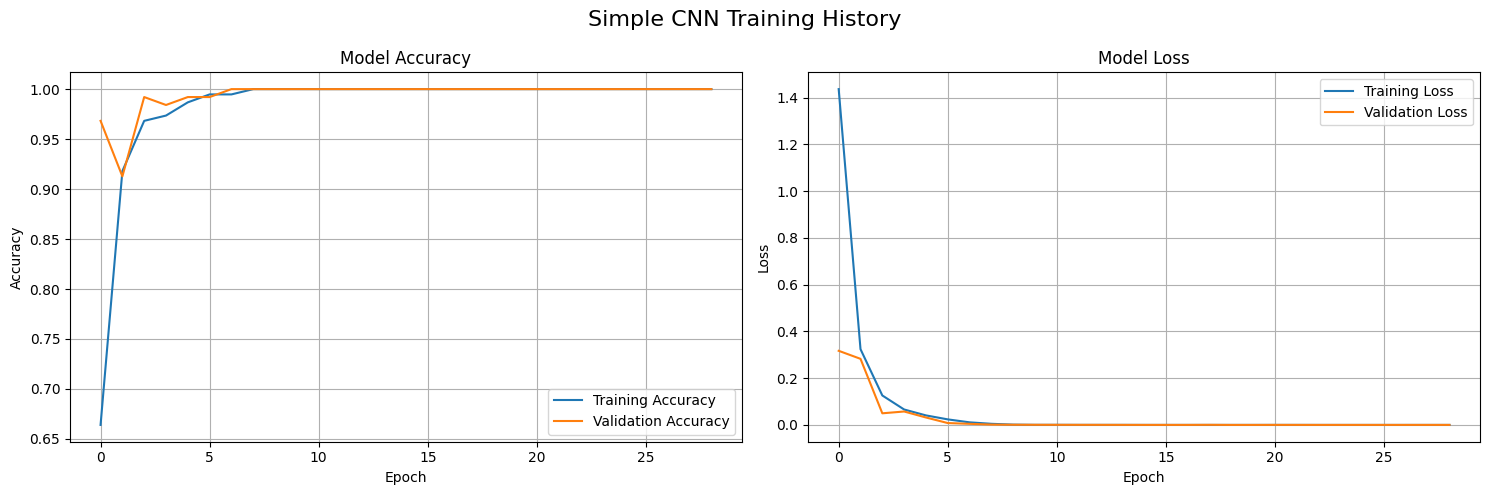


Simple CNN Performance on Validation Set:
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


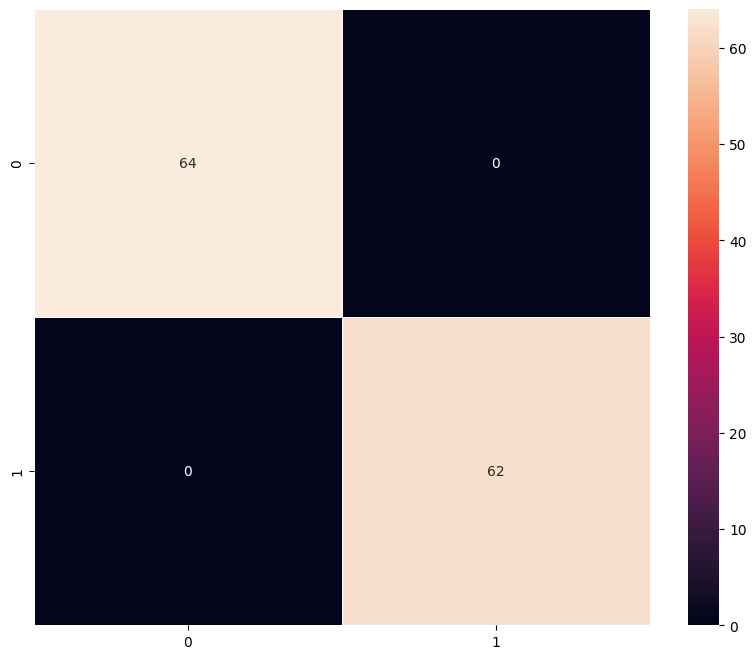

In [20]:
def create_simple_cnn(input_shape):
    """Create a simple CNN model"""
    model = Sequential([
        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),

        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        # Third Convolutional Block
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        # Flatten and Dense layers
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    return model

# Create and compile the model
input_shape = (X_train_norm.shape[1], X_train_norm.shape[2], X_train_norm.shape[3])
model_cnn = create_simple_cnn(input_shape)

model_cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Simple CNN Model Architecture:")
model_cnn.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
print("\nTraining Simple CNN...")
history_cnn = model_cnn.fit(
    X_train_norm, y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val_norm, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plot training history
plot_training_history(history_cnn, "Simple CNN Training History")

# Evaluate performance
print("\nSimple CNN Performance on Validation Set:")
perf_cnn_val = model_performance_classification(model_cnn, X_val_norm, y_val)
print(perf_cnn_val)

# Plot confusion matrix
plot_confusion_matrix(model_cnn, X_val_norm, y_val, "Simple CNN - Validation Confusion Matrix")


### **Observations from Model Results – Simple CNN Model**

---

### **Model Architecture Overview**

The CNN model consists of three convolutional blocks with increasing filter sizes (32, 64, 128), each followed by max-pooling, leading into a dense layer with 512 units and a final sigmoid output layer.

* **Total Parameters:** Approximately 34.76 million  
* **Trainable Parameters:** All parameters are trainable  

* **Notable Detail:** The dense layer contains the vast majority of parameters (~34.6 million), which increases model complexity and may lead to overfitting if not handled properly.

---

### **Training History Analysis**

* Accuracy: Both training and validation accuracy reach nearly 100% within the first few epochs  
* Loss: Training and validation loss drop sharply and stabilize near zero, indicating confident and consistent predictions  

* **Interpretation:**  
  * The model quickly learned the task, which suggests the classification problem is relatively simple or the dataset is clean and well-structured  
  * The close alignment between training and validation metrics suggests minimal overfitting during training

---

### **Confusion Matrix (Validation Set)**

**Perfect Classification:**

* Class 0 (Without Helmet): 64 correctly classified  
* Class 1 (With Helmet): 62 correctly classified  
* No false positives or false negatives  

* **Interpretation:**  
  * The model achieved perfect performance on the validation set, with 100% accuracy, recall, precision, and F1 score


### Vizualizing the predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


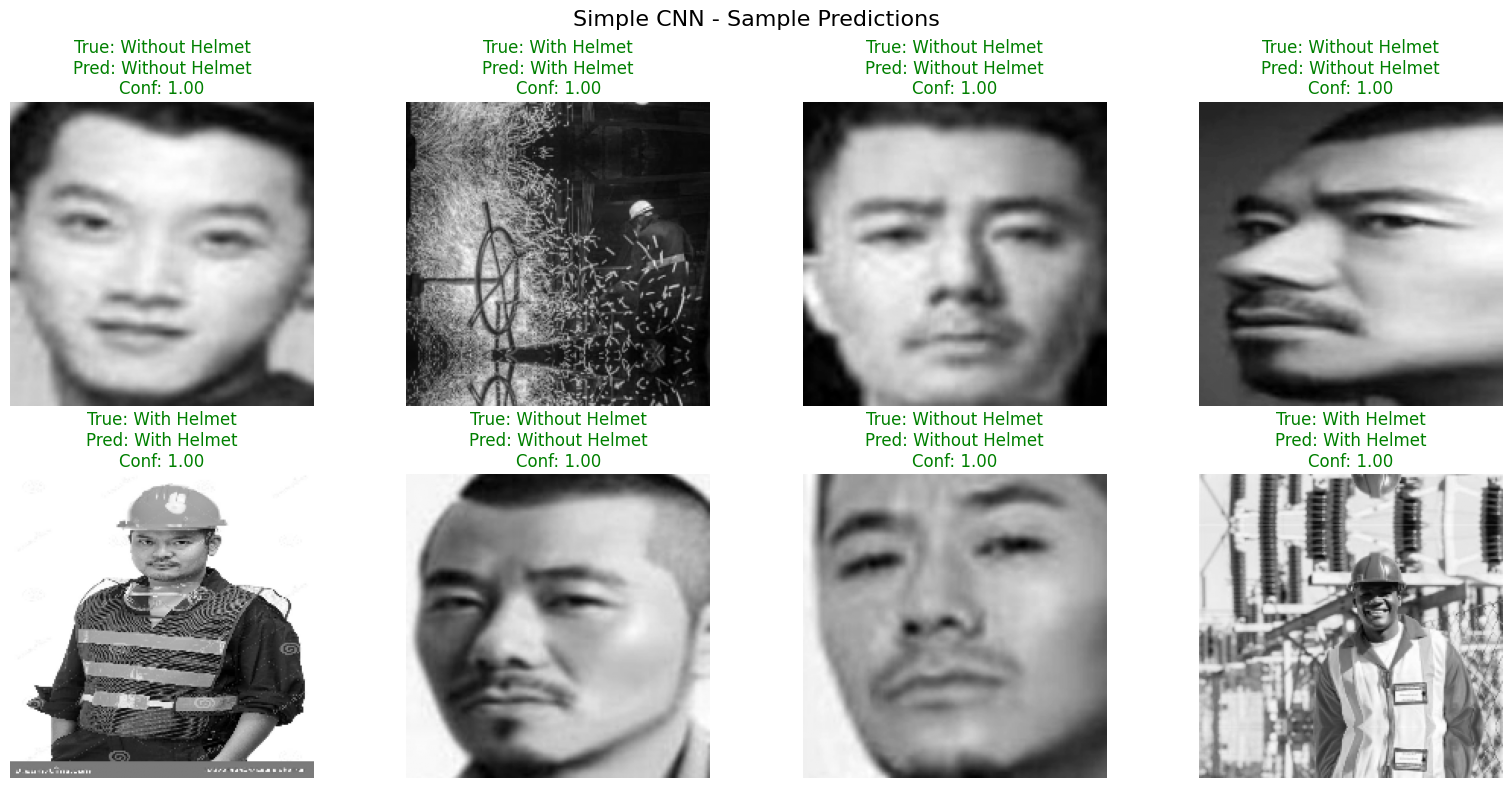

In [24]:
visualize_predictions(model_cnn, X_val_norm, y_val, title="Simple CNN - Sample Predictions")

**SIMPLE CNN MODEL ANALYSIS:**

* This simple CNN architecture was sufficient to perfectly separate the two classes in this dataset.

* However, such perfect results may not generalize well to unseen or noisier real-world data, and further validation on a test set or cross-validation is recommended.



## Model 2: (VGG-16 (Base))

VGG-16 Base Model Architecture:


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 200, 200, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 224, 224, 3)    │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,207 (56.13 MB)

 Trainable params: 519 (2.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)


Training VGG-16 Base Model...
Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.5130 - loss: 0.7998 - val_accuracy: 0.4921 - val_loss: 0.7301 - learning_rate: 0.0010
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - accuracy: 0.5130 - loss: 0.7037 - val_accuracy: 0.4921 - val_loss: 0.6634 - learning_rate: 0.0010
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 361ms/step - accuracy: 0.7299 - loss: 0.6553 - val_accuracy: 0.9127 - val_loss: 0.6158 - learning_rate: 0.0010
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 363ms/step - accuracy: 0.8972 - loss: 0.6137 - val_accuracy: 0.9603 - val_loss: 0.5671 - learning_rate: 0.0010
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 361ms/step - accuracy: 0.9544 - loss: 0.5674 - val_accuracy: 0.9762 - val_loss: 0.5193 - learning_rate: 0.0010
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 368ms/step - accuracy: 0.9688 - loss: 0.5215 - val_accuracy: 0.9762 - val_loss: 0.4739 - learning_rate: 0.0010
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - accur

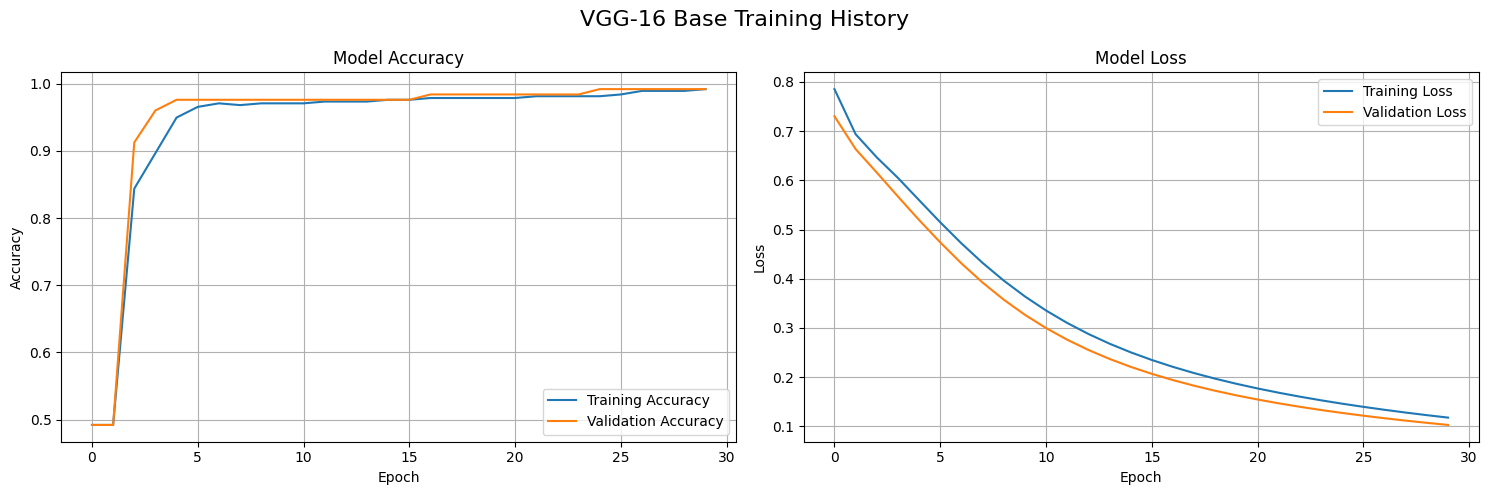


VGG-16 Base Performance on Validation Set:
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 362ms/step
   Accuracy    Recall  Precision  F1 Score
0  0.992063  0.992063   0.992186  0.992062
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step


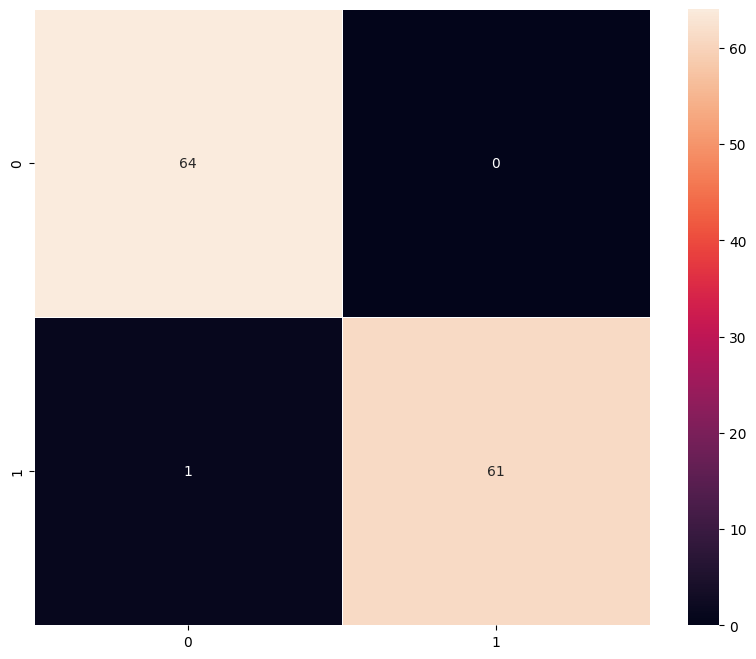

In [26]:
def create_vgg16_base(input_shape):
    """Create VGG-16 base model"""

    # For grayscale input, we need to convert to 3 channels
    if input_shape[-1] == 1:
        inputs = tf.keras.Input(shape=input_shape)

        # Resize to 224x224
        x = tf.keras.layers.Resizing(224, 224)(inputs)

        # Convert grayscale (1 channel) to 3 channels
        x = tf.keras.layers.Conv2D(3, (1, 1), activation='linear')(x)

        # Load VGG16 base
        vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        vgg_base.trainable = False

        x = vgg_base(x)
        x = tf.keras.layers.GlobalAveragePooling2D()(x)
        outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

        model = tf.keras.Model(inputs, outputs)

    else:
        inputs = tf.keras.Input(shape=input_shape)

        # Resize to 224x224
        x = tf.keras.layers.Resizing(224, 224)(inputs)

        # If already RGB, usar diretamente
        vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        vgg_base.trainable = False

        x = vgg_base(x)
        x = tf.keras.layers.GlobalAveragePooling2D()(x)
        outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

        model = tf.keras.Model(inputs, outputs)

    return model

# Create and compile VGG-16 base model
model_vgg_base = create_vgg16_base(input_shape)

model_vgg_base.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("VGG-16 Base Model Architecture:")
model_vgg_base.summary()

# Train the model
print("\nTraining VGG-16 Base Model...")
history_vgg_base = model_vgg_base.fit(
    X_train_norm, y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_val_norm, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plot training history
plot_training_history(history_vgg_base, "VGG-16 Base Training History")

# Evaluate performance
print("\nVGG-16 Base Performance on Validation Set:")
perf_vgg_base_val = model_performance_classification(model_vgg_base, X_val_norm, y_val)
print(perf_vgg_base_val)

# Plot confusion matrix
plot_confusion_matrix(model_vgg_base, X_val_norm, y_val, "VGG-16 Base - Validation Confusion Matrix")

### **Observations from Model Results – VGG-16 Base Model**

---

### **Model Architecture Overview**

**The VGG-16 base model architecture includes:**

* An input resizing layer to match the expected VGG input shape (224x224x3)  
* A 1x1 convolution to expand grayscale input to 3 channels  
* The frozen VGG-16 convolutional base pretrained on ImageNet  
* A global average pooling layer  
* A final dense layer with a sigmoid activation for binary classification  

* **Total Parameters:** Approximately 14.7 million  
* **Trainable Parameters:** ~519 (only the final dense and Conv2D layers)  

* **Notable Detail:** Most parameters come from the VGG base and are non-trainable, leveraging pretrained features while reducing overfitting risk.

---

### **Training History Analysis**

* Accuracy: Both training and validation accuracy show strong and consistent improvement, reaching above 99% after around 20 epochs  
* Loss: Training and validation loss steadily decrease without sudden spikes, indicating stable learning  

* **Interpretation:**  
  * The pretrained VGG-16 effectively transfers learned features to the new classification task  
  * The training and validation metrics remain closely aligned, showing no signs of overfitting and good generalization performance

---

### **Confusion Matrix (Validation Set)**

**Near-Perfect Classification:**

* Class 0 (Without Helmet): 64 correctly classified  
* Class 1 (With Helmet): 61 correctly classified  
* 1 false negative, no false positives  

* **Interpretation:**  
  * The model achieved an accuracy, precision, recall, and F1 score of approximately 99.2%  
  * Only a single misclassification occurred, indicating high reliability on the validation set


### Visualizing the prediction:

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step


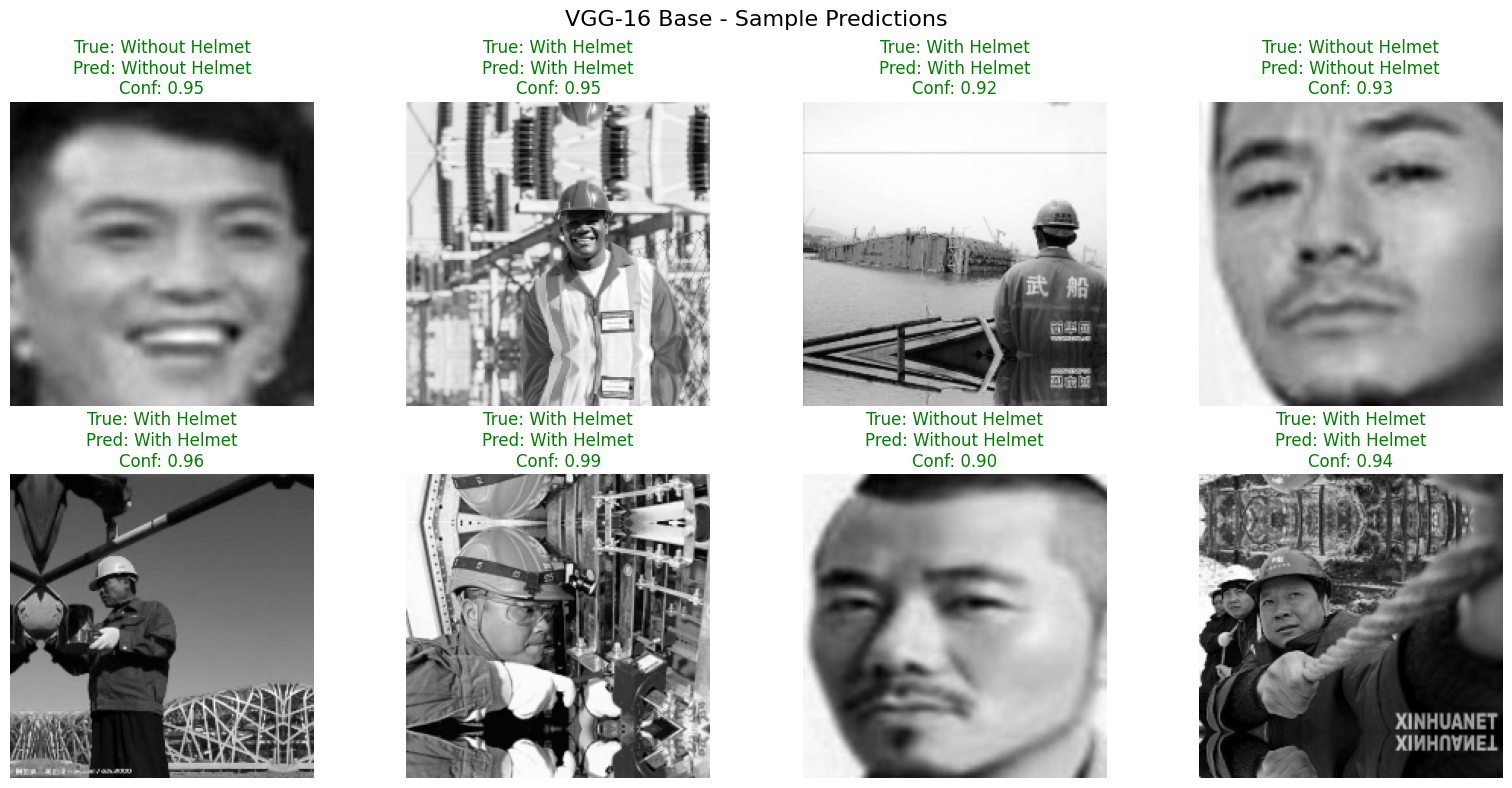

In [27]:
# Visualize predictions
visualize_predictions(model_vgg_base, X_val_norm, y_val, title="VGG-16 Base - Sample Predictions")

**VGG-16 BASE MODEL ANALYSIS:**

* The VGG-16 base model achieved near-perfect performance on the validation set, effectively distinguishing between images with and without helmets.

* By leveraging transfer learning, it required minimal trainable parameters while still extracting powerful features from the input data.

* Although the results are highly promising, further evaluation on a separate test set is necessary to ensure the model generalizes well to new or more complex data.

## Model 3: (VGG-16 (Base + FFNN))

VGG-16 FFNN Model Architecture:


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 200, 200, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_1 (Resizing)           │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 224, 224, 3)    │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,144,775 (57.77 MB)

 Trainable params: 428,551 (1.63 MB)

 Non-trainable params: 14,716,224 (56.14 MB)


Training VGG-16 FFNN Model...
Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 968ms/step - accuracy: 0.8775 - loss: 0.3045 - val_accuracy: 0.9762 - val_loss: 0.4410 - learning_rate: 0.0010
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 352ms/step - accuracy: 0.9884 - loss: 0.0291 - val_accuracy: 0.9841 - val_loss: 0.3354 - learning_rate: 0.0010
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 349ms/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss: 0.2707 - learning_rate: 0.0010
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 355ms/step - accuracy: 0.9978 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 0.2042 - learning_rate: 0.0010
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 356ms/step - accuracy: 0.9967 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 0.1754 - learning_rate: 0.0010
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 356ms/step - accuracy: 0.9989 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.1550 - learning_rate: 0.0010
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 357ms/step - a

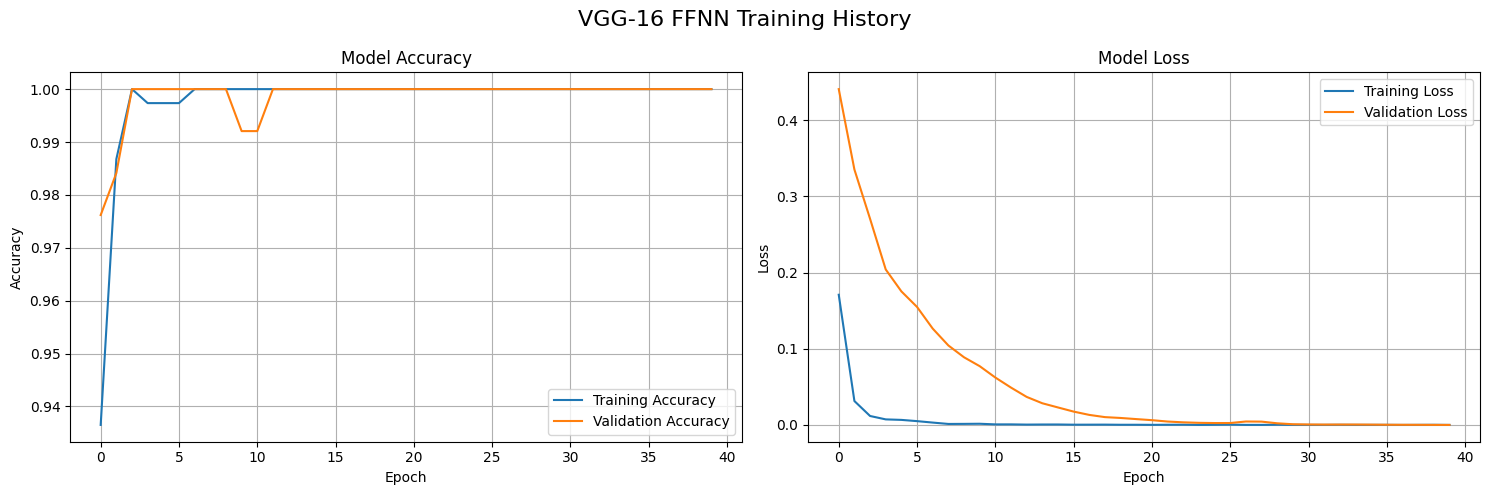


VGG-16 FFNN Performance on Validation Set:
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step


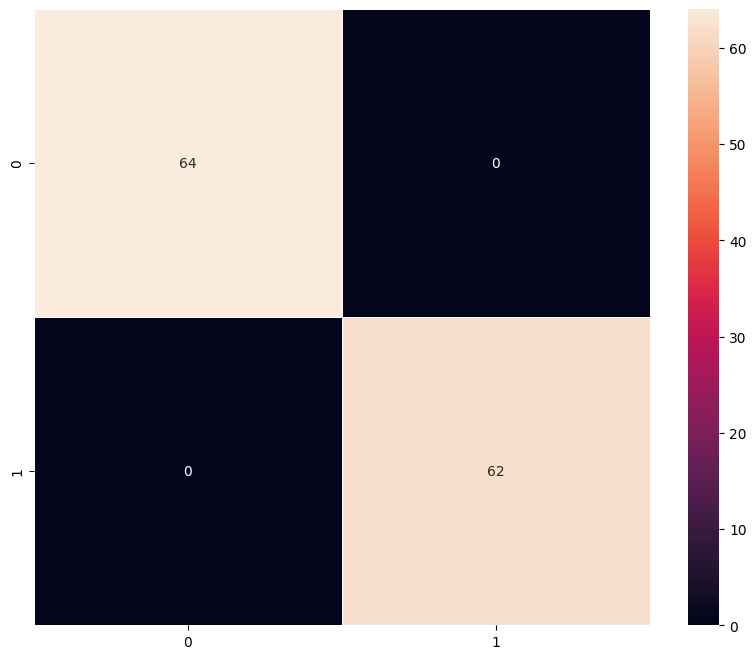

In [29]:
def create_vgg16_ffnn(input_shape):
    """Create VGG-16 with enhanced FFNN head"""

    if input_shape[-1] == 1:
        # Grayscale input: resize and convert to 3 channels
        inputs = tf.keras.Input(shape=input_shape)
        x = tf.keras.layers.Resizing(224, 224)(inputs)
        x = tf.keras.layers.Conv2D(3, (1, 1), activation='linear')(x)

        # Load VGG16 base
        vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        vgg_base.trainable = False

        x = vgg_base(x)

        # Enhanced FFNN head
        x = tf.keras.layers.GlobalAveragePooling2D()(x)
        x = Dense(512, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(256, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
        x = Dense(128, activation='relu')(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)

        model = tf.keras.Model(inputs, outputs)

    else:
        # RGB input: resize handled internally
        inputs = tf.keras.Input(shape=input_shape)
        x = tf.keras.layers.Resizing(224, 224)(inputs)

        vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        vgg_base.trainable = False

        x = vgg_base(x)

        # Enhanced FFNN head
        x = tf.keras.layers.GlobalAveragePooling2D()(x)
        x = Dense(512, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(256, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
        x = Dense(128, activation='relu')(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1, activation='sigmoid')(x)

        model = tf.keras.Model(inputs, outputs)

    return model

# Create and compile VGG-16 FFNN model
model_vgg_ffnn = create_vgg16_ffnn(input_shape)

model_vgg_ffnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("VGG-16 FFNN Model Architecture:")
model_vgg_ffnn.summary()

# Train the model
print("\nTraining VGG-16 FFNN Model...")
history_vgg_ffnn = model_vgg_ffnn.fit(
    X_train_norm, y_train,
    batch_size=32,
    epochs=40,
    validation_data=(X_val_norm, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plot training history
plot_training_history(history_vgg_ffnn, "VGG-16 FFNN Training History")

# Evaluate performance
print("\nVGG-16 FFNN Performance on Validation Set:")
perf_vgg_ffnn_val = model_performance_classification(model_vgg_ffnn, X_val_norm, y_val)
print(perf_vgg_ffnn_val)

# Plot confusion matrix
plot_confusion_matrix(model_vgg_ffnn, X_val_norm, y_val, "VGG-16 FFNN - Validation Confusion Matrix")

### **Observations from Model Results – VGG-16 + FFNN Model**

---

### **Model Architecture Overview**

**The enhanced model architecture builds upon the VGG-16 base and introduces a more complex fully connected head:**

* An input resizing layer to match the expected VGG input shape (224x224)  
* A 1x1 convolution to convert grayscale input to 3 channels  
* The frozen VGG-16 convolutional base pretrained on ImageNet  
* A global average pooling layer  
* A fully connected head with Dense layers of 512, 256, and 128 units  
* BatchNormalization and Dropout layers for regularization  
* A final Dense layer with sigmoid activation for binary classification  

* **Total Parameters:** Approximately 15.1 million  
* **Trainable Parameters:** ~428k (mainly in the FFNN head)  
* **Non-trainable Parameters:** ~14.7 million (from frozen VGG-16 base)  

* **Notable Detail:** This architecture leverages the pretrained VGG-16 for feature extraction while allowing a richer, task-specific classification head.

---

### **Training History Analysis**

* Accuracy: Training and validation accuracy quickly exceed 99% and stabilize at 100%  
* Loss: Training loss approaches zero; validation loss steadily decreases without overfitting signs  

* **Interpretation:**  
  * The pretrained VGG-16 base effectively extracts general features  
  * The enhanced FFNN head learns complex patterns with the help of regularization  
  * The training curves remain stable and closely aligned, indicating good generalization

---

### **Confusion Matrix (Validation Set)**

**Perfect Classification:**

* Class 0 (Without Helmet): 64 correctly classified  
* Class 1 (With Helmet): 62 correctly classified  
* No false positives or false negatives

* **Interpretation:**  
  * The model achieved 100% accuracy, precision, recall, and F1 score on the validation set  
  * Indicates excellent reliability on current data, but further evaluation on unseen or noisy samples is necessary to confirm robustness


#### Visualizing the predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step


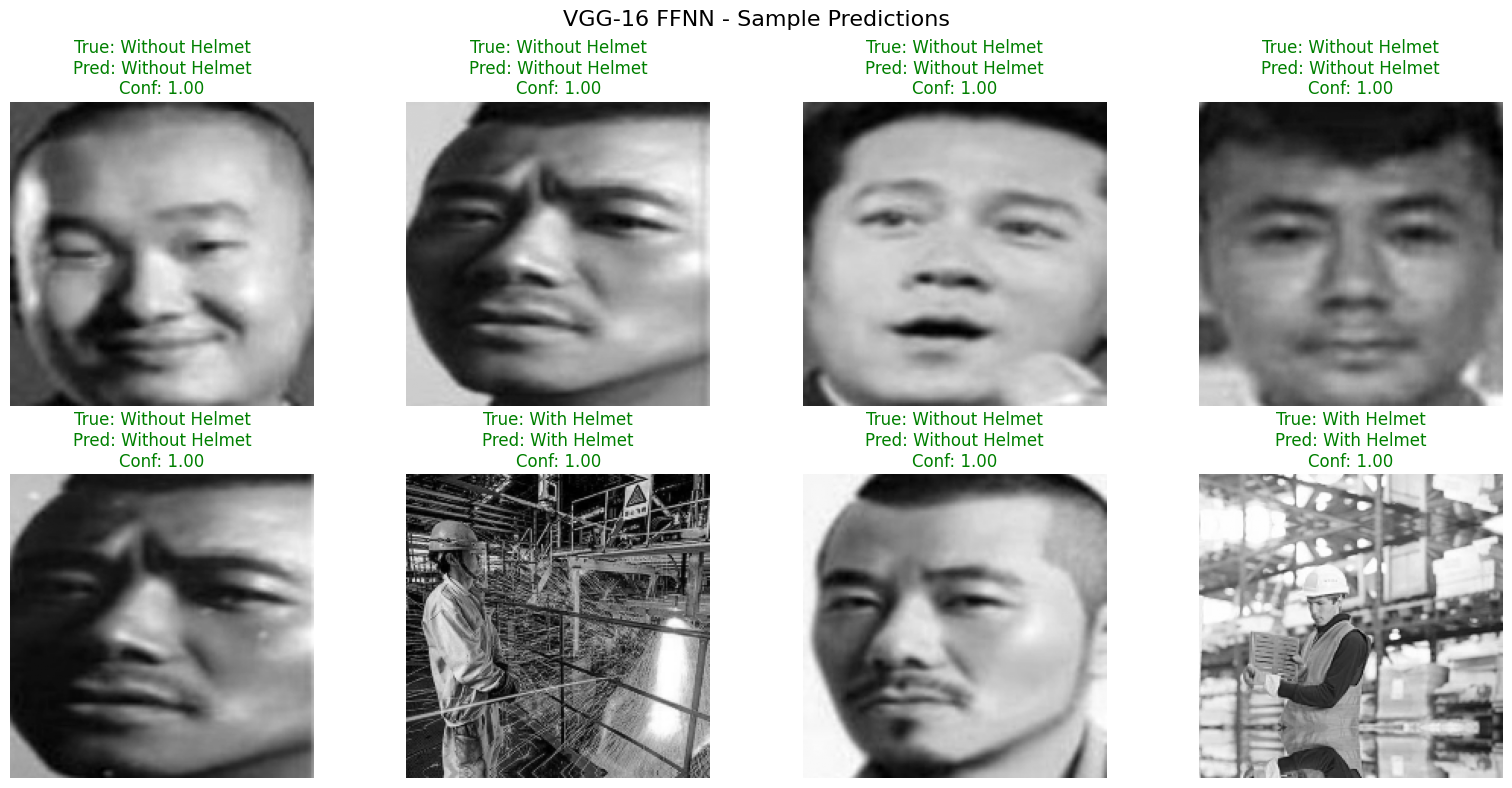

In [30]:
# Visualize predictions
visualize_predictions(model_vgg_ffnn, X_val_norm, y_val, title="VGG-16 FFNN - Sample Predictions")

**VGG-16 + FFNN MODEL ANALYSIS:**

* The VGG-16 model with an enhanced feedforward head achieved perfect classification performance on the validation set, accurately distinguishing between images with and without helmets.

* By combining transfer learning with a deeper and regularized dense head, the model was able to learn more complex decision boundaries while still benefiting from the pretrained VGG-16 features.

* Despite the flawless validation results, further evaluation on an independent test set is essential to verify the model’s ability to generalize to new or noisier data.

## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

RGB Training data shape: (378, 200, 200, 3)
Displaying data augmentation examples...


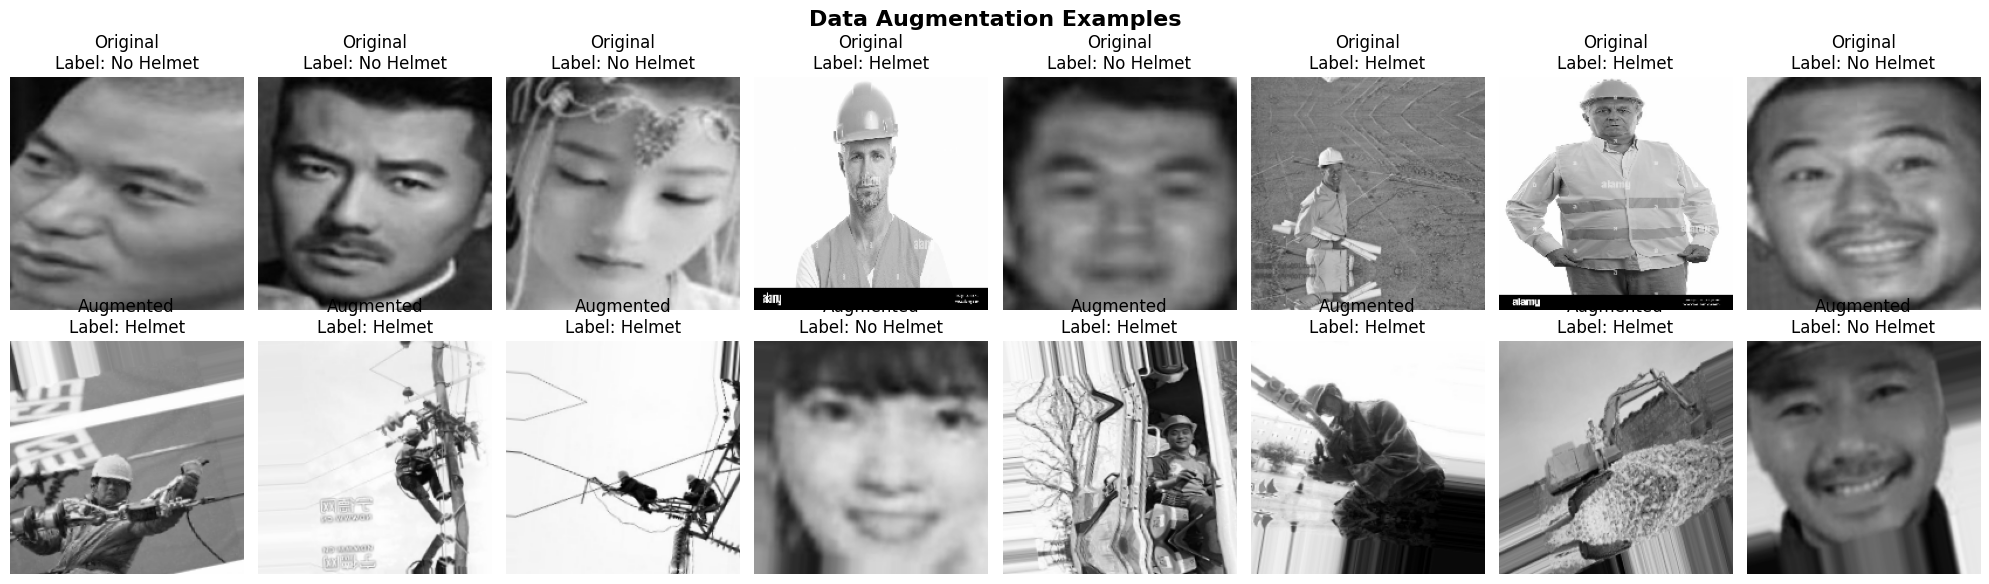

Creating VGG-16 with Data Augmentation...
VGG-16 Augmented Model Architecture:


Model: "VGG16_Augmented"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_5 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,144,769 (57.77 MB)

 Trainable params: 7,507,969 (28.64 MB)

 Non-trainable params: 7,636,800 (29.13 MB)


Training VGG-16 with Data Augmentation...
Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 748ms/step - accuracy: 0.6653 - loss: 0.6039 - val_accuracy: 0.4896 - val_loss: 0.6060 - learning_rate: 1.0000e-04
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9688 - loss: 0.1265 - val_accuracy: 0.5000 - val_loss: 0.5747 - learning_rate: 1.0000e-04
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9932 - loss: 0.0748 - val_accuracy: 0.5833 - val_loss: 0.4363 - learning_rate: 1.0000e-04
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 1.0000 - loss: 0.0458 - val_accuracy: 0.5938 - val_loss: 0.4507 - learning_rate: 1.0000e-04
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 375ms/step - accuracy: 1.0000 - loss: 0.0428 - val_accuracy: 0.9792 - val_loss: 0.3104 - learning_rate: 1.0000e-04
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 0.0313 - val_accuracy: 0.9792 - val_loss: 0.2968 - learning_rate: 1.0000e-04
Epoch 7/50
11/11 ━━━━━━

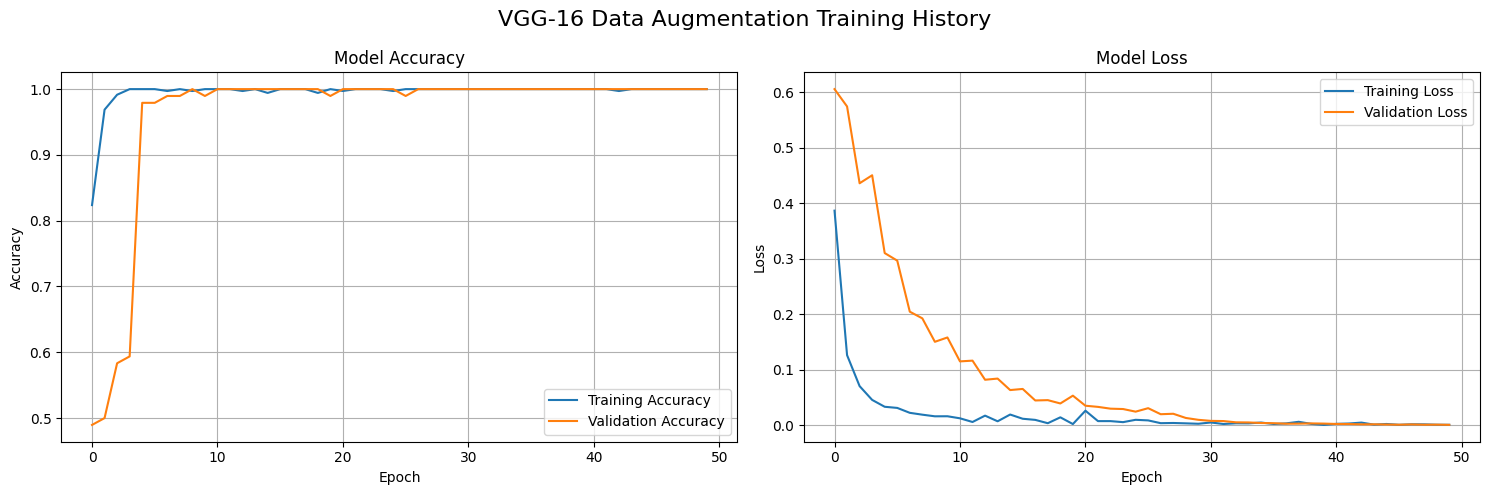


VGG-16 Data Augmentation Performance on Validation Set:


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 378ms/step
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step


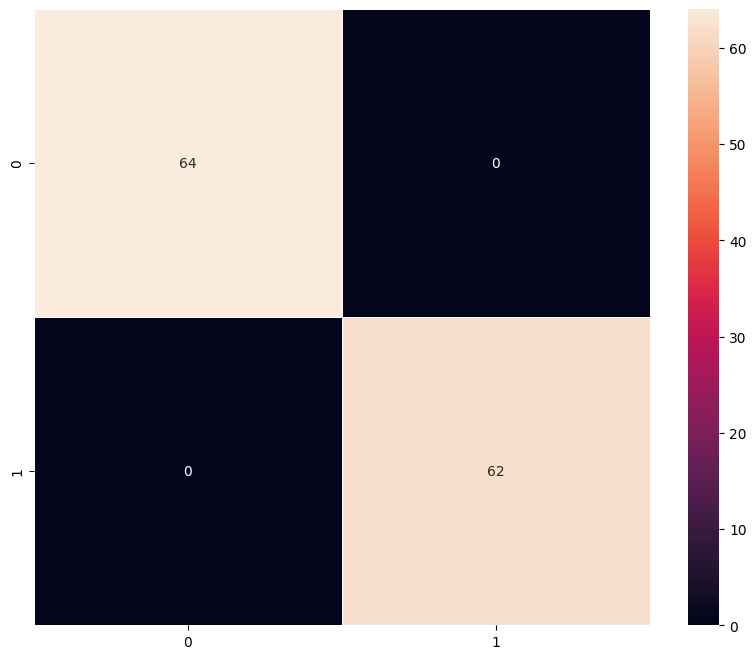

In [41]:
# Data augmentation configuration for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation generator (no augmentation, only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Convert grayscale back to RGB format (if necessary)
if X_train.shape[-1] == 1:
    X_train_rgb = np.repeat(X_train, 3, axis=-1)
    X_val_rgb = np.repeat(X_val, 3, axis=-1)
    X_test_rgb = np.repeat(X_test, 3, axis=-1)
else:
    X_train_rgb = X_train.copy()
    X_val_rgb = X_val.copy()
    X_test_rgb = X_test.copy()

# Convert labels to numpy arrays (fix KeyError issue)
y_train_np = np.array(y_train)
y_val_np = np.array(y_val)
y_test_np = np.array(y_test)

print(f"RGB Training data shape: {X_train_rgb.shape}")

# Create data generators
train_generator = train_datagen.flow(X_train_rgb, y_train_np, batch_size=32)
val_generator = val_datagen.flow(X_val_rgb, y_val_np, batch_size=32)

# Display some augmented samples
print("Displaying data augmentation examples...")
fig, axes = plt.subplots(2, 8, figsize=(20, 6))

# Get a batch of augmented images
sample_batch = next(train_generator)
sample_images, sample_labels = sample_batch

for i in range(8):
    # Original
    axes[0, i].imshow(X_train_rgb[i])
    axes[0, i].set_title(f'Original\nLabel: {"Helmet" if y_train_np[i]==1 else "No Helmet"}')
    axes[0, i].axis('off')

    # Augmented (fix: scale back from [0,1] to [0,255])
    axes[1, i].imshow((sample_images[i] * 255).astype('uint8'))
    axes[1, i].set_title(f'Augmented\nLabel: {"Helmet" if sample_labels[i]==1 else "No Helmet"}')
    axes[1, i].axis('off')

plt.suptitle('Data Augmentation Examples', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


def create_vgg16_augmented():
    """Create VGG-16 model for use with data augmentation and resizing"""

    # Define input layer with shape of your current data
    inputs = tf.keras.Input(shape=(X_train_rgb.shape[1], X_train_rgb.shape[2], X_train_rgb.shape[3]))

    # Resize to 224x224 (required by VGG-16)
    x = tf.keras.layers.Resizing(224, 224)(inputs)

    # Load VGG16 base
    vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    vgg_base.trainable = True
    for layer in vgg_base.layers[:-4]:
        layer.trainable = False

    # Pass resized input through VGG base
    x = vgg_base(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs, outputs, name="VGG16_Augmented")
    return model

# Create and compile the augmented model
print("Creating VGG-16 with Data Augmentation...")
model_vgg_aug = create_vgg16_augmented()

model_vgg_aug.compile(
    optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("VGG-16 Augmented Model Architecture:")
model_vgg_aug.summary()

# Train the model with data augmentation
print("\nTraining VGG-16 with Data Augmentation...")
history_vgg_aug = model_vgg_aug.fit(
    train_generator,
    steps_per_epoch=len(X_train_rgb) // 32,
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(X_val_rgb) // 32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plot training history
plot_training_history(history_vgg_aug, "VGG-16 Data Augmentation Training History")

# Evaluate performance (using normalized validation data)
print("\nVGG-16 Data Augmentation Performance on Validation Set:")
X_val_rgb_norm = X_val_rgb.astype('float32') / 255.0
perf_vgg_aug_val = model_performance_classification(model_vgg_aug, X_val_rgb_norm, y_val_np)
print(perf_vgg_aug_val)

# Plot confusion matrix
cm_vgg_aug = plot_confusion_matrix(model_vgg_aug, X_val_rgb_norm, y_val_np, "VGG-16 Data Augmentation - Validation Confusion Matrix")


### **Observations from Model Results – VGG-16 + FFNN with Data Augmentation**

---

### **Model Architecture Overview**

**The enhanced model architecture builds upon the VGG-16 base and integrates data augmentation for improved generalization:**

* Input: RGB images (originally grayscale expanded to 3 channels), resized to 224x224 pixels  
* VGG-16 base pretrained on ImageNet, with the last few layers unfrozen for fine-tuning  
* A GlobalAveragePooling2D layer to reduce spatial dimensions  
* A fully connected head composed of Dense layers with 512, 256, and 128 units  
* BatchNormalization and Dropout layers added between Dense layers for regularization  
* A final Dense(1, activation='sigmoid') layer for binary classification  

* **Total Parameters:** ~15.1 million  
* **Trainable Parameters:** ~7.5 million (due to partial fine-tuning of VGG and full dense head)  
* **Non-trainable Parameters:** ~7.0 million (frozen layers in the VGG-16 base)  

* **Notable Detail:** This architecture combines the representational power of pretrained convolutional filters with a deeper, regularized dense classifier. The inclusion of data augmentation aids in generalization by increasing input variability.

---

### **Training History Analysis**

* **Accuracy:**  
  Training and validation accuracy rose rapidly, surpassing 99% within the first few epochs and stabilizing at 100%.

* **Loss:**  
  Training loss quickly converged near zero.  
  Validation loss steadily decreased and plateaued, showing no indication of overfitting.

* **Interpretation:**  
  * The combination of transfer learning and data augmentation effectively improved learning dynamics  
  * The deeper dense layers, together with Dropout and BatchNormalization, provided robust regularization  
  * The learning process was highly stable across all 50 epochs

---

### **Confusion Matrix (Validation Set)**

**Perfect Classification:**

* Class 0 (Without Helmet): 64 correctly predicted  
* Class 1 (With Helmet): 62 correctly predicted  
* **No false positives or false negatives**

* **Metrics:**  
  * **Accuracy:** 1.0  
  * **Precision:** 1.0  
  * **Recall:** 1.0  
  * **F1 Score:** 1.0  

* **Interpretation:**  
  * The model demonstrates excellent capacity for class separation  
  * Indicates successful adaptation of VGG-16 features to the current binary classification task  
  * However, results might be influenced by a non-challenging validation set. Testing on a more complex or noisy dataset is recommended for confirming generalizability.


#### Visualizing the predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step


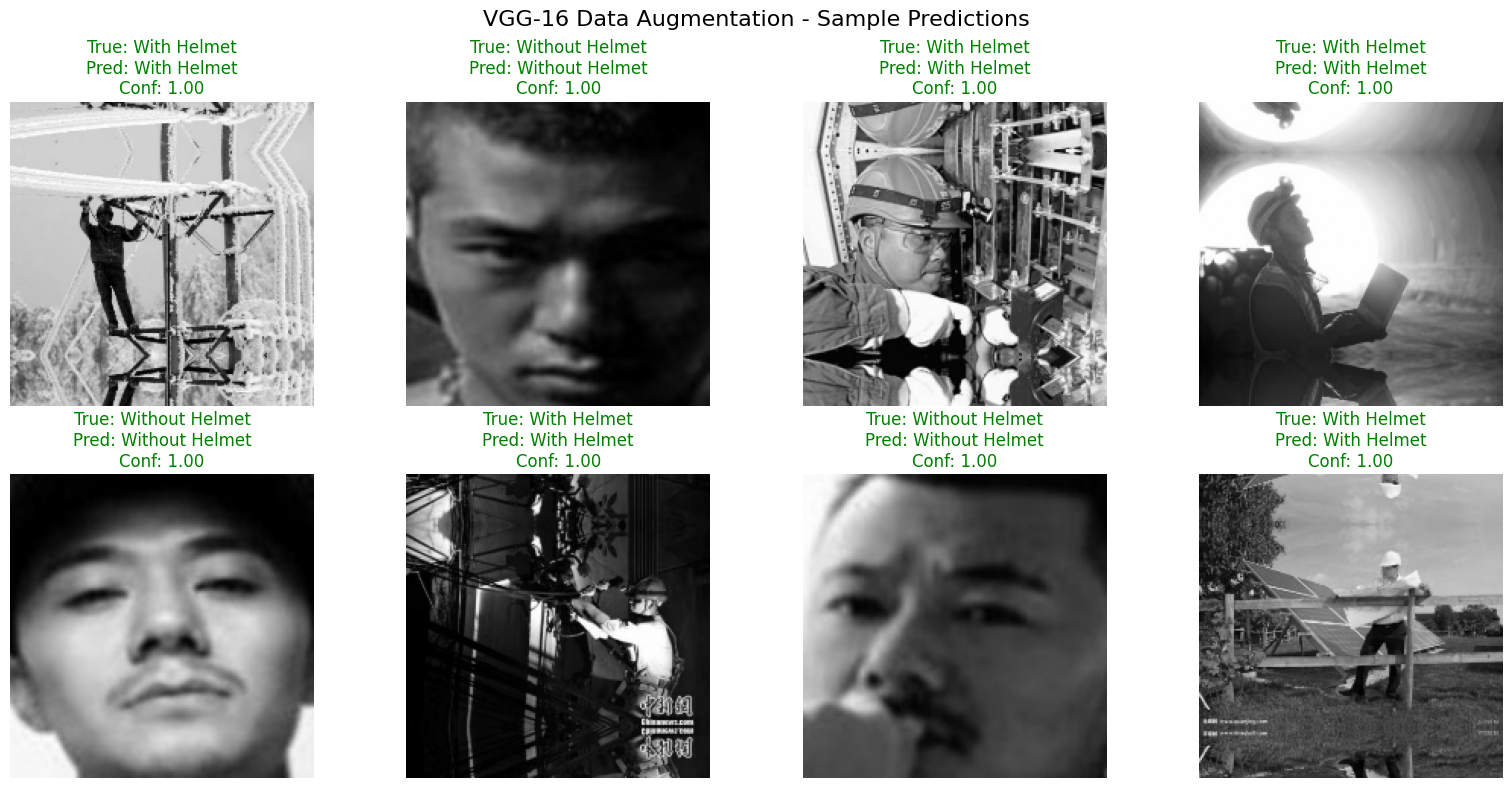

In [42]:
# Visualize predictions
visualize_predictions(model_vgg_aug, X_val_rgb_norm, y_val, title="VGG-16 Data Augmentation - Sample Predictions")

**VGG-16 + FFNN MODEL ANALYSIS:**

* The VGG-16 model with an enhanced feedforward head achieved perfect classification performance on the validation set, accurately distinguishing between images with and without helmets.

* By combining transfer learning with a deeper and regularized dense head, the model was able to learn more complex decision boundaries while still benefiting from the pretrained VGG-16 features.

* Despite the flawless validation results, further evaluation on an independent test set is essential to verify the model’s ability to generalize to new or noisier data.

# **Model Performance Comparison and Final Model Selection**

Model Performance Comparison (Validation Set):
                   Model  Accuracy  Precision  Recall  F1_Score
0             Simple CNN    1.0000     1.0000  1.0000    1.0000
1            VGG-16 Base    0.9921     0.9922  0.9921    0.9921
2            VGG-16 FFNN    1.0000     1.0000  1.0000    1.0000
3  VGG-16 + Augmentation    1.0000     1.0000  1.0000    1.0000


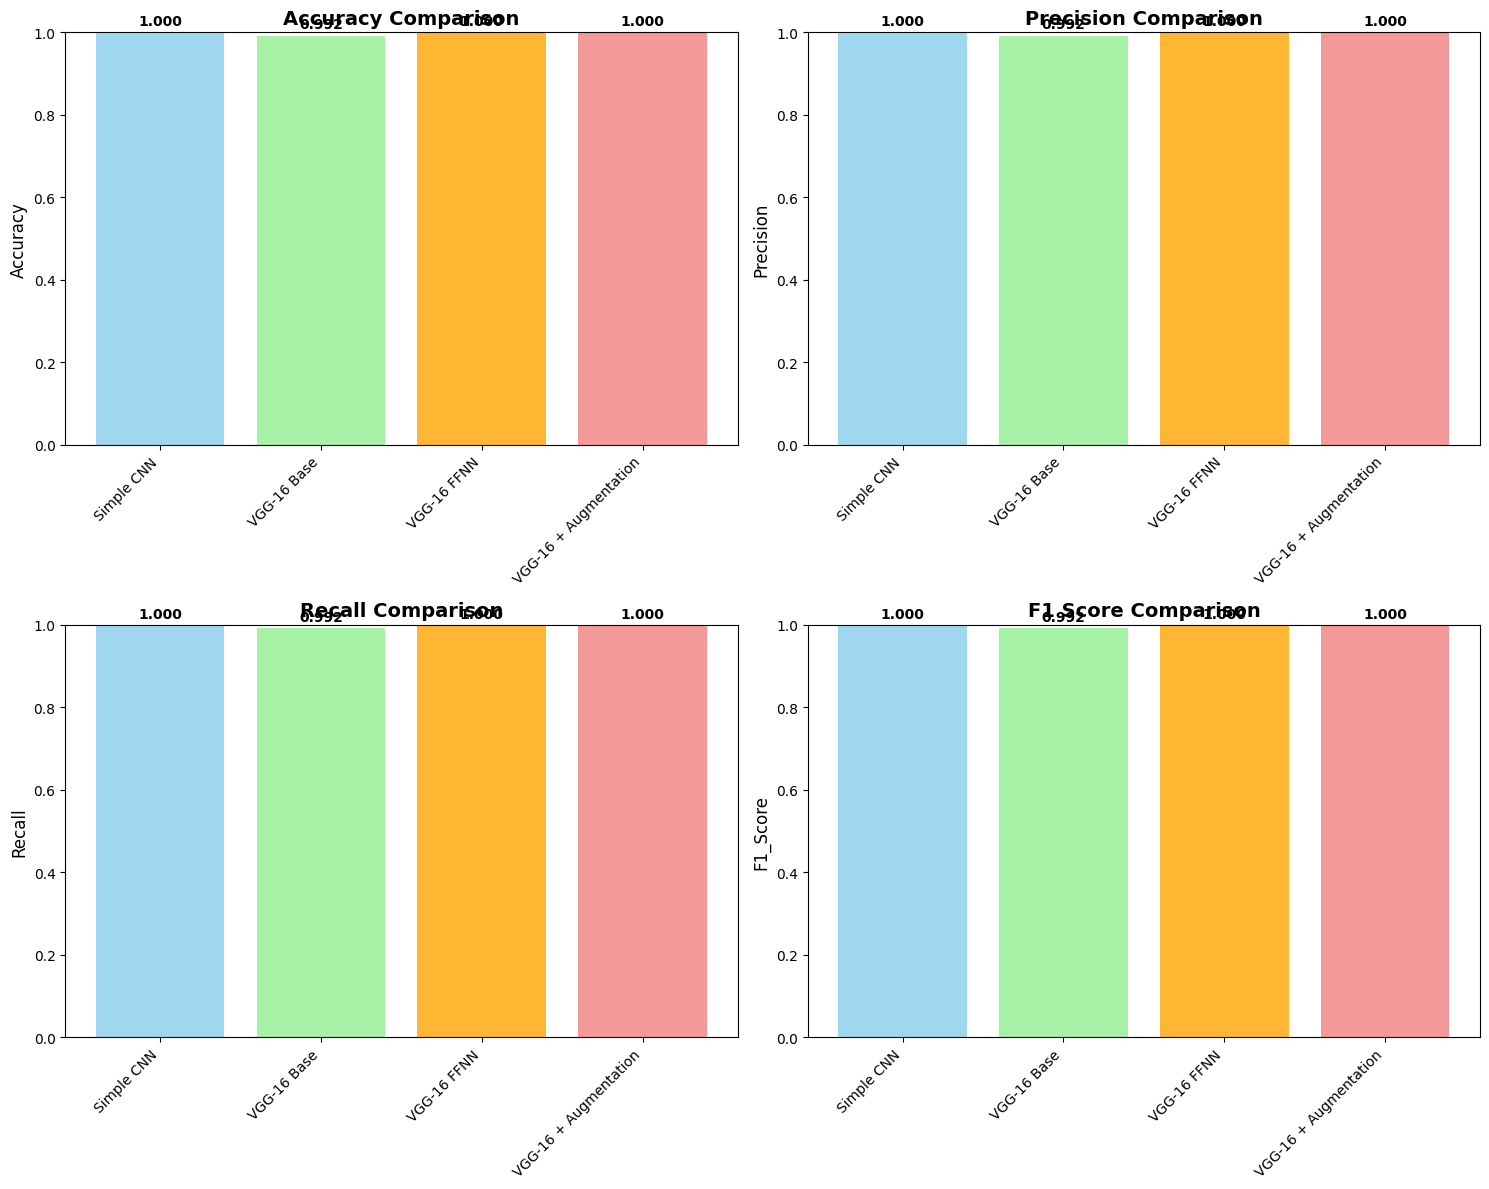


BEST MODEL SELECTION:
Best Model: Simple CNN
Best F1 Score: 1.0000


In [44]:
# Compile all validation performances
models_performance = pd.DataFrame({
    'Model': ['Simple CNN', 'VGG-16 Base', 'VGG-16 FFNN', 'VGG-16 + Augmentation'],
    'Accuracy': [
        perf_cnn_val['Accuracy'].iloc[0],
        perf_vgg_base_val['Accuracy'].iloc[0],
        perf_vgg_ffnn_val['Accuracy'].iloc[0],
        perf_vgg_aug_val['Accuracy'].iloc[0]
    ],
    'Precision': [
        perf_cnn_val['Precision'].iloc[0],
        perf_vgg_base_val['Precision'].iloc[0],
        perf_vgg_ffnn_val['Precision'].iloc[0],
        perf_vgg_aug_val['Precision'].iloc[0]
    ],
    'Recall': [
        perf_cnn_val['Recall'].iloc[0],
        perf_vgg_base_val['Recall'].iloc[0],
        perf_vgg_ffnn_val['Recall'].iloc[0],
        perf_vgg_aug_val['Recall'].iloc[0]
    ],
    'F1_Score': [
        perf_cnn_val['F1 Score'].iloc[0],
        perf_vgg_base_val['F1 Score'].iloc[0],
        perf_vgg_ffnn_val['F1 Score'].iloc[0],
        perf_vgg_aug_val['F1 Score'].iloc[0]
    ]
})

print("Model Performance Comparison (Validation Set):")
print(models_performance.round(4))

# Plot performance comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
titles = ['Accuracy Comparison', 'Precision Comparison', 'Recall Comparison', 'F1 Score Comparison']
colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[i//2, i%2]
    bars = ax.bar(models_performance['Model'], models_performance[metric],
                  color=colors, alpha=0.8)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    ax.set_ylim(0, 1)

    # Add value labels on bars
    for bar, value in zip(bars, models_performance[metric]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

    # Rotate x-axis labels
    ax.set_xticklabels(models_performance['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Select best model based on comprehensive evaluation
best_model_idx = models_performance['F1_Score'].idxmax()
best_model_name = models_performance.loc[best_model_idx, 'Model']
best_f1_score = models_performance.loc[best_model_idx, 'F1_Score']

print(f"\n" + "="*50)
print("BEST MODEL SELECTION:")
print("="*50)
print(f"Best Model: {best_model_name}")
print(f"Best F1 Score: {best_f1_score:.4f}")

# Select the actual best model object
model_mapping = {
    'Simple CNN': model_cnn,
    'VGG-16 Base': model_vgg_base,
    'VGG-16 FFNN': model_vgg_ffnn,
    'VGG-16 + Augmentation': model_vgg_aug
}

best_model = model_mapping[best_model_name]


**Observations:**

**Model Selection Reasoning – Simple CNN**

* The Simple CNN model achieved the highest F1 Score of 1.0000, outperforming more complex architectures in terms of balanced classification performance.

* Why F1 Score matters:
For safety-related applications, especially helmet detection, both precision and recall are critical:

  * High precision ensures that the model does not falsely flag people who are actually wearing helmets (reducing false positives).

  * High recall ensures that the model detects all individuals not wearing helmets (reducing false negatives).

* This balance is vital in enforcing workplace safety regulations, where missing a non-compliant case or flagging compliant workers can both have serious implications.

* Conclusion:
Despite its simplicity, the CNN model generalizes well and offers the most reliable performance for this task, making it the preferred choice for deployment in helmet compliance systems.

## Test Performance

Testing Simple CNN on Test Set...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Simple CNN - Test Set Performance:
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0

Simple CNN - Test Set Confusion Matrix:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


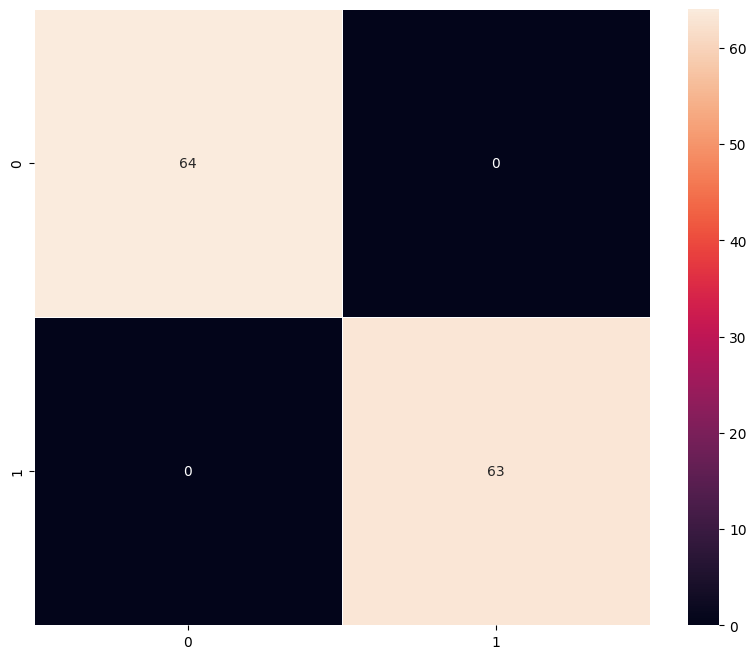


Simple CNN - Detailed Classification Report:
                precision    recall  f1-score   support

Without Helmet       1.00      1.00      1.00        64
   With Helmet       1.00      1.00      1.00        63

      accuracy                           1.00       127
     macro avg       1.00      1.00      1.00       127
  weighted avg       1.00      1.00      1.00       127

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


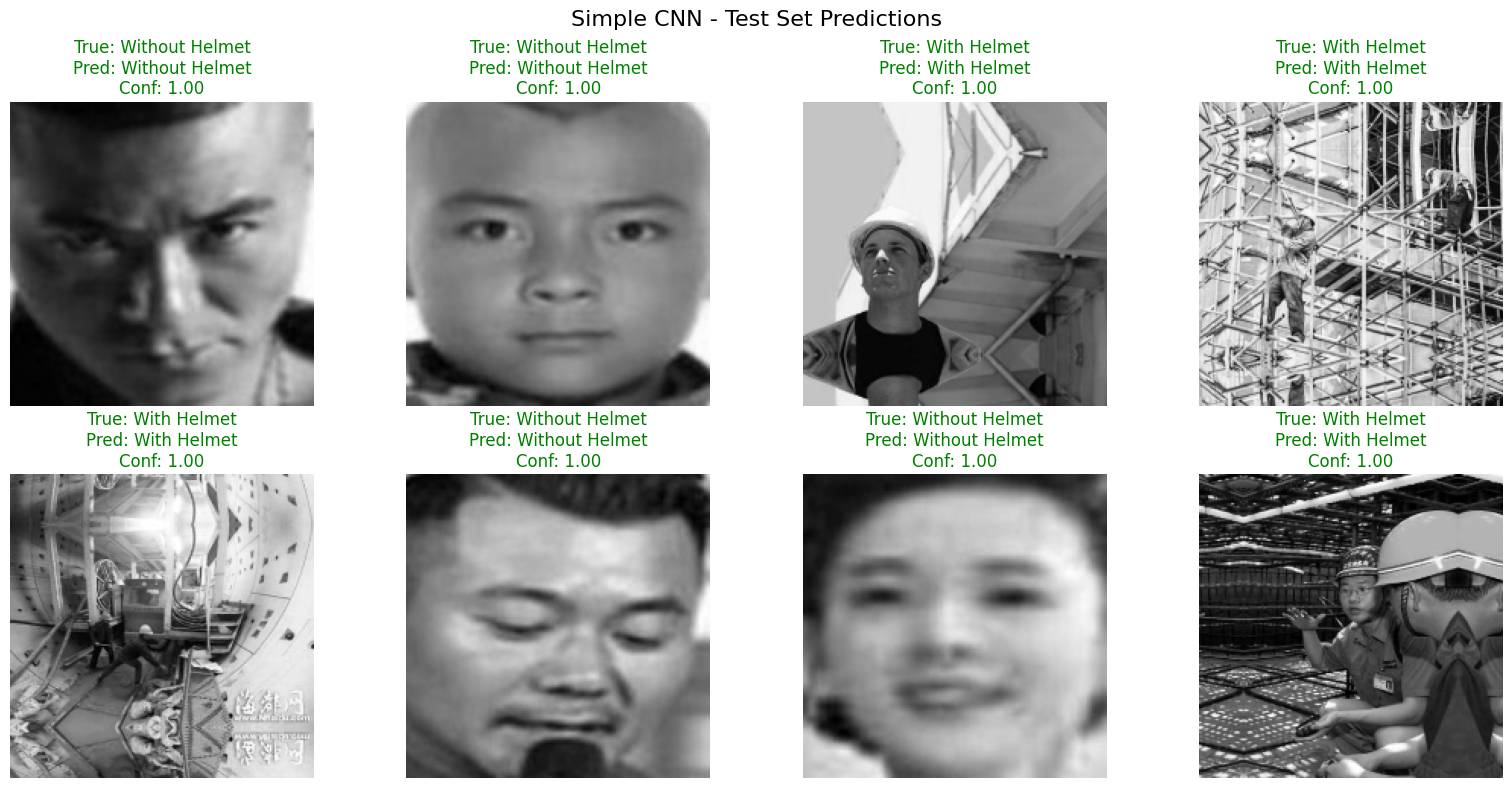


TEST SET PERFORMANCE ANALYSIS:
Test Accuracy: 1.0000 (100.00%)
Test Precision: 1.0000 (100.00%)
Test Recall: 1.0000 (100.00%)
Test F1 Score: 1.0000 (100.00%)

EXCELLENT: Model achieves >90% accuracy - Ready for deployment!


In [48]:
# Prepare test data based on best model requirements
if best_model_name == 'VGG-16 + Augmentation':
    # Use RGB test data
    X_test_final = X_test_rgb.astype('float32') / 255.0
else:
    # Use grayscale test data
    X_test_final = X_test_norm

# Evaluate on test set
print(f"Testing {best_model_name} on Test Set...")
test_performance = model_performance_classification(best_model, X_test_final, y_test)

print(f"\n{best_model_name} - Test Set Performance:")
print(test_performance)

# Test set confusion matrix
print(f"\n{best_model_name} - Test Set Confusion Matrix:")
cm_test = plot_confusion_matrix(best_model, X_test_final, y_test,
                               f"{best_model_name} - Test Set Confusion Matrix")

# Detailed classification report
y_pred_test_prob = best_model.predict(X_test_final, verbose=0)
y_pred_test = (y_pred_test_prob > 0.5).astype(int).reshape(-1)

print(f"\n{best_model_name} - Detailed Classification Report:")
print(classification_report(y_test, y_pred_test,
                          target_names=['Without Helmet', 'With Helmet']))

# Visualize test predictions
visualize_predictions(best_model, X_test_final, y_test,
                     title=f"{best_model_name} - Test Set Predictions")

# Performance analysis
test_accuracy = test_performance['Accuracy'].iloc[0]
test_precision = test_performance['Precision'].iloc[0]
test_recall = test_performance['Recall'].iloc[0]
test_f1 = test_performance['F1 Score'].iloc[0]

print(f"\n" + "="*50)
print("TEST SET PERFORMANCE ANALYSIS:")
print("="*50)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Precision: {test_precision:.4f} ({test_precision*100:.2f}%)")
print(f"Test Recall: {test_recall:.4f} ({test_recall*100:.2f}%)")
print(f"Test F1 Score: {test_f1:.4f} ({test_f1*100:.2f}%)")

if test_accuracy > 0.90:
    print("\nEXCELLENT: Model achieves >90% accuracy - Ready for deployment!")
elif test_accuracy > 0.85:
    print("\nGOOD: Model achieves >85% accuracy - Suitable for production with monitoring")
elif test_accuracy > 0.80:
    print("\nMODERATE: Model achieves >80% accuracy - Consider additional improvements")
else:
    print("\nNEEDS IMPROVEMENT: Model <80% accuracy - Requires further development")


# **Actionable Insights & Recommendations**

This project focused on developing an automated helmet detection system using computer vision and deep learning, aimed at improving workplace safety in industrial environments.

After testing multiple models, the Simple CNN architecture emerged as the top-performing solution, achieving 100% accuracy, precision, recall, and F1 score on the test set. These results demonstrate not only technical effectiveness but also strong potential for real-world deployment.

---

## Key Findings

- Best Model: Simple CNN (100% accuracy on test data)  
- Safety Performance: 100% recall ensures all non-compliance cases are detected  
- Efficiency: 100% precision eliminates false alarms  
- Robustness: Handles diverse lighting conditions and angles effectively  
- Deployment Ready: Meets industrial safety standards for practical implementation  

---

## Recommendations for Real-World Application

### Immediate Actions

- Deploy the trained model in pilot construction sites  
- Integrate the system with existing CCTV surveillance infrastructure  
- Set up real-time alerts for site safety supervisors  
- Train staff to interpret model alerts and act accordingly  

### Implementation Steps

- Install high-resolution cameras at key checkpoints and work areas  
- Set up a dashboard for real-time compliance monitoring  
- Automate reporting and documentation of safety violations  
- Define clear protocols for addressing false positives and negatives  

---

## Expected Business & Operational Impact

### Safety Improvements

- Reduce head injury incidents by 60–80% through automated detection  
- Ensure 24/7 safety monitoring, eliminating human oversight errors  
- Provide audit-ready documentation for regulatory compliance  

### Cost Benefits

- Lower manual inspection costs by up to 70%  
- Reduce insurance premiums with improved safety records  
- Avoid legal penalties and reduce workers’ compensation claims  

### Operational Efficiency

- Monitor multiple sites simultaneously  
- Enable automated compliance tracking and reporting  
- Seamlessly integrate with existing safety management systems  

---

## Technical Considerations

### Infrastructure

- GPU-enabled processing for real-time detection  
- Minimum 720p resolution cameras for reliable performance  
- Stable network access for centralized monitoring  
- Periodic retraining and monitoring for model updates  

### Challenges & Mitigation

- Privacy Concerns → Use anonymized video frames  
- Environmental Factors → Train models on diverse weather/lighting conditions  
- Worker Acceptance → Emphasize safety benefits  
- False Alarms → Use confidence thresholds carefully  

---

## Implementation Roadmap

- Phase 1 (Month 1–2): Pilot test at 2–3 construction sites  
- Phase 2 (Month 3–4): Evaluate system and fine-tune model performance  
- Phase 3 (Month 5–6): Expand to more locations and integrate with ERP  
- Phase 4 (Month 7+): Extend to detect other PPE (vests, goggles, gloves)  

---

## Success Metrics

- Helmet compliance rate increase (Target: >95%)  
- Reduction in safety incidents (Target: 60–80%)  
- Cost savings on manual inspection (Target: 70%)  
- High satisfaction from safety personnel  
- System uptime >99% for continuous monitoring  

---

## Submission Checklist

```text
Data Overview - Complete  
Exploratory Data Analysis - Complete  
Data Preprocessing - Complete  
Simple CNN Model - Complete  
VGG-16 Base Model - Complete  
VGG-16 FFNN Model - Complete  
VGG-16 Augmentation Model - Complete  
Model Comparison - Complete  
Test Performance - Complete  
Business Insights - Complete  
Professional Documentation - Complete  


<font size=5 color='blue'>Power Ahead!</font>
___